# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
cities

['kavieng',
 'puerto ayora',
 'faya',
 'asau',
 'mys shmidta',
 'chuy',
 'bud',
 'airai',
 'coihaique',
 'ushuaia',
 'samalaeulu',
 'el alto',
 'dunedin',
 'mahebourg',
 'rylsk',
 'maningrida',
 'nuevo progreso',
 'hovd',
 'barrow',
 'nipawin',
 'laela',
 'belushya guba',
 'hermanus',
 'rikitea',
 'ancud',
 'cayenne',
 'coruripe',
 'bartica',
 'atuona',
 'taybad',
 'san jose',
 'toba',
 'hasaki',
 'acapulco',
 'jamestown',
 'seminole',
 'licheng',
 'isla vista',
 'avarua',
 'husavik',
 'vaini',
 'new norfolk',
 'vengerovo',
 'kumylzhenskaya',
 'fort nelson',
 'kaitangata',
 'hobart',
 'ribeira grande',
 'srednekolymsk',
 'sandpoint',
 'victoria',
 'barentsburg',
 'hithadhoo',
 'busselton',
 'isangel',
 'ngunguru',
 'kapaa',
 'east london',
 'mataura',
 'saint-philippe',
 'port-gentil',
 'vaitupu',
 'bredasdorp',
 'eureka',
 'broome',
 'dikson',
 'haines junction',
 'butaritari',
 'albany',
 'bethel',
 'yulara',
 'qaanaaq',
 'tasiilaq',
 'sao filipe',
 'issoudun',
 'villazon',
 'naze',


In [10]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + "vaini").json()
response

{'coord': {'lon': 74.49, 'lat': 15.34},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 73.4,
  'pressure': 1011,
  'humidity': 88,
  'temp_min': 73.4,
  'temp_max': 73.4},
 'visibility': 8000,
 'wind': {'speed': 3.36, 'deg': 270},
 'clouds': {'all': 40},
 'dt': 1563419071,
 'sys': {'type': 1,
  'id': 9229,
  'message': 0.007,
  'country': 'IN',
  'sunrise': 1563410399,
  'sunset': 1563456963},
 'timezone': 19800,
 'id': 1273574,
 'name': 'Vaini',
 'cod': 200}

In [13]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
counter = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for city in cities:

    response = requests.get(query_url + city).json()

    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} | {city}")
        counter+=1
        time.sleep(1)
    except KeyError:
        print("City not found. Skipping...")

Beginning Data Retrieval
--------------------------------
Processing Record 1 | kavieng
Processing Record 2 | puerto ayora
Processing Record 3 | faya
City not found. Skipping...
City not found. Skipping...
Processing Record 4 | chuy
Processing Record 5 | bud
Processing Record 6 | airai
Processing Record 7 | coihaique
Processing Record 8 | ushuaia
City not found. Skipping...
Processing Record 9 | el alto
Processing Record 10 | dunedin
Processing Record 11 | mahebourg
Processing Record 12 | rylsk
Processing Record 13 | maningrida
Processing Record 14 | nuevo progreso
Processing Record 15 | hovd
Processing Record 16 | barrow
Processing Record 17 | nipawin
Processing Record 18 | laela
City not found. Skipping...
Processing Record 19 | hermanus
Processing Record 20 | rikitea
Processing Record 21 | ancud
Processing Record 22 | cayenne
Processing Record 23 | coruripe
Processing Record 24 | bartica
Processing Record 25 | atuona
Processing Record 26 | taybad
Processing Record 27 | san jose
Proc

Processing Record 225 | san quintin
Processing Record 226 | cape town
Processing Record 227 | constitucion
Processing Record 228 | ambilobe
Processing Record 229 | bumba
Processing Record 230 | iqaluit
Processing Record 231 | ambunti
Processing Record 232 | gushikawa
Processing Record 233 | fairbanks
Processing Record 234 | oranjemund
City not found. Skipping...
Processing Record 235 | axim
Processing Record 236 | kon tum
Processing Record 237 | codrington
Processing Record 238 | diamantino
Processing Record 239 | te anau
City not found. Skipping...
Processing Record 240 | sosva
Processing Record 241 | peruibe
Processing Record 242 | moussoro
Processing Record 243 | yurga
Processing Record 244 | tomohon
Processing Record 245 | zhigansk
Processing Record 246 | matara
City not found. Skipping...
Processing Record 247 | san ramon
Processing Record 248 | bubaque
Processing Record 249 | uni
Processing Record 250 | tuatapere
Processing Record 251 | dzilam gonzalez
Processing Record 252 | int

Processing Record 454 | hirara
Processing Record 455 | pingliang
City not found. Skipping...
Processing Record 456 | mount pleasant
City not found. Skipping...
Processing Record 457 | salvador
Processing Record 458 | zhigalovo
Processing Record 459 | fortuna
Processing Record 460 | sorong
Processing Record 461 | ugoofaaru
Processing Record 462 | honiara
Processing Record 463 | green river
Processing Record 464 | loa janan
Processing Record 465 | semey
Processing Record 466 | karasjok
Processing Record 467 | dandong
Processing Record 468 | alice springs
Processing Record 469 | carutapera
Processing Record 470 | port hardy
Processing Record 471 | naro moru
Processing Record 472 | vagay
Processing Record 473 | gao
Processing Record 474 | jataizinho
Processing Record 475 | salalah
Processing Record 476 | hofn
Processing Record 477 | katsuura
Processing Record 478 | sabang
Processing Record 479 | kuching
City not found. Skipping...
Processing Record 480 | rio gallegos
Processing Record 481 

In [14]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [16]:
# Save data frame to CSV
#weather_data to_csv
weather_data_output = "Output_CSV/weather_data.csv"


# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kavieng,20,PG,1563420000,76,-2.57,150.80,83.39,13.24
1,Puerto Ayora,28,EC,1563420002,93,-0.74,-90.35,70.00,5.99
2,Faya,0,SA,1563420003,37,18.39,42.45,69.80,2.55
3,Chuy,81,UY,1563420004,87,-33.69,-53.46,54.41,12.97
4,Bud,93,NO,1563420005,87,62.91,6.91,55.40,6.93


In [35]:
df = pd.DataFrame(weather_data)
export_csv = df.to_csv("weather.csv"), r'C:\Users\sobai\Zewari_DataBootcamp_HW\Homework_6_API JSON\export_dataframe.csv'

In [36]:
csv_data = pd.read_csv("weather.csv")
csv_data

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Kavieng,20,PG,1563420000,76,-2.57,150.80,83.39,13.24
1,1,Puerto Ayora,28,EC,1563420002,93,-0.74,-90.35,70.00,5.99
2,2,Faya,0,SA,1563420003,37,18.39,42.45,69.80,2.55
3,3,Chuy,81,UY,1563420004,87,-33.69,-53.46,54.41,12.97
4,4,Bud,93,NO,1563420005,87,62.91,6.91,55.40,6.93
5,5,Airai,88,TL,1563420007,46,-8.93,125.41,82.85,4.25
6,6,Coihaique,75,CL,1563420008,60,-45.58,-72.07,41.00,3.36
7,7,Ushuaia,40,AR,1563419730,52,-54.81,-68.31,41.00,14.99
8,8,El Alto,90,BO,1563420011,92,-16.50,-68.19,33.80,4.70
9,9,Dunedin,86,NZ,1563420012,48,-45.87,170.50,52.00,5.01


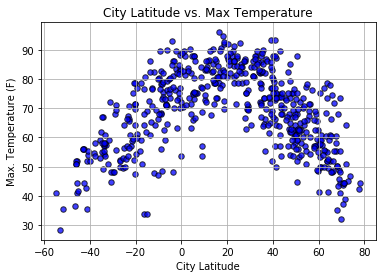

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=30, color='blue',  edgecolor = 'black', label = 'Lat v. Temp', alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save the figure
plt.savefig('City Latitude_vs_Max Temprature.png')

# Show plot
plt.show()


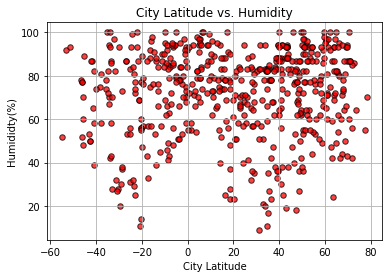

In [38]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=30, color='red',  edgecolor = 'black', label = 'Lat v. Temp', alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humididty(%)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save the figure
plt.savefig('City Latitude_vs_Humidity.png')

# Show plot
plt.show()

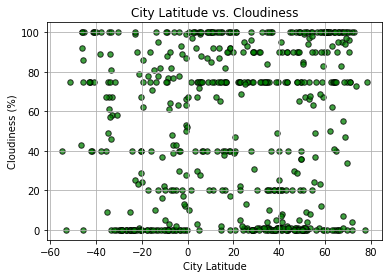

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=30, color='green',  edgecolor = 'black', label = 'Lat v. Temp', alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save the figure
plt.savefig('City Latiutude vs Cloudiness.png')

# Show plot
plt.show()

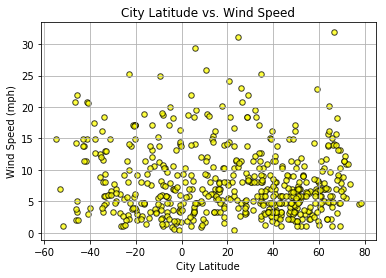

In [34]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=30, color='yellow',  edgecolor = 'black', label = 'Lat v. Temp', alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save the figure
plt.savefig('City Latitude vs Wind Speed.png')

# Show plot
plt.show()